<a href="https://colab.research.google.com/github/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/blob/main/03_Deep_Learning/03_Deep_Learning_intro_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: PyTorch and Deep Learning [Solutions]

This week, we will dip our toes into the world of deep learning!


## Contents

1. [Introduction to PyTorch](#1-introduction-to-pytorch)
2. [Gradients and Autograd](#2-gradients-and-autograd)
3. [From Functions to Layers](#3-from-functions-to-layers)
4. [From Layers to Neural Networks](#4-from-layers-to-neural-networks)
5. [Loss Function](#5-loss-function)
6. [Model Loading and Saving](#6-model-loading-and-saving)
7. [Exercise: Species Distribution Modelling with Deep Learning](#7-exercise-species-distribution-modelling-with-deep-learning)
8. [Summary](#8-summary)



## Background on Deep Learning Libraries

Like for other machine learning models, there exist a number of libraries that allow you to
implement deep learning models easily. For Python, some of the most popular ones are:
1. [PyTorch](https://pytorch.org/) (by Meta/facebook; we will use it in all of this course)
2. [TensorFlow](https://www.tensorflow.org/) (by Google)
3. [Jax](https://jax.readthedocs.io/en/latest/) (an ecosystem that supports deep learning frameworks
   among other mathematical implementations)
4. [Keras](https://keras.io/) (not a dedicated deep learning library itself, but a high-level layer
   on top of PyTorch, TensorFlow or Jax)

There are many others, but not all are still maintained (or as professionally done as these). Since
deep learning is a very fast moving idea, it is highly recommended to use proper and up-to-date
frameworks like the ones mentioned above. These will allow you to do anything reliably, from
learning over prototyping and doing research to implementing deep learning-based apps for your
computer or smartphone.

For completeness, the following deep learning libraries have been _deprecated_ and should not be
used anymore: Apache MXNet, Microsoft CMTK, Caffe, Theano.



## Notes

- If a line starts with the fountain pen symbol (🖌️), it asks you to implement a code part or
answer a question.
- Lines starting with the light bulb symbol (💡) provide important information or tips and tricks.

---

## 1. Introduction to PyTorch


PyTorch should come pre-installed in Google Colab:

In [246]:
import torch

torch.__version__

'2.4.0'

PyTorch (`torch` base package in Python) is primarily a deep learning library these days but can also be used for general mathematical operations, similar to NumPy.

It actually builds on NumPy's `ndarray` and introduces a new type of multidimensional matrix, called _tensor_.
In deep learning language, a tensor is a multi-dimensional array of a single data type (integer, float, _etc._) that holds deep learning model inputs, calculations, and outputs ([PyTorch documentation](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)).

We will see later why PyTorch introduces a new data type, but for the time being, all you need to know is that `torch.tensor` operates similarly to `np.array`:

In [247]:
# construct a new Torch tensor
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(f'Values:\n{my_tensor}\n')

print(f'Length: {len(my_tensor)}')
print(f'Size: {my_tensor.size()}')                      # like np.array.shape
print(f'Number of dimensions: {my_tensor.dim()}')       # like np.array.ndim
print(f'Number of elements: {my_tensor.numel()}')       # like np.array.size
print(f'Number type: {my_tensor.type()}')               # like np.array.dtype

Values:
tensor([[1, 2, 3],
        [4, 5, 6]])

Length: 2
Size: torch.Size([2, 3])
Number of dimensions: 2
Number of elements: 6
Number type: torch.LongTensor


You can easily convert between `torch.Tensor` and `np.array`:

In [249]:
import numpy as np

my_numpy_array = my_tensor.numpy()                      # convert to NumPy ndarray

other_tensor = torch.from_numpy(np.arange(10))          # convert from NumPy ndarray to Torch tensor

Conversion across number types is also easily done:

In [250]:
print(f'Current number type: {my_tensor.type()}')

my_tensor = my_tensor.float()

print(f'After calling .float(): {my_tensor.type()}')

Current number type: torch.LongTensor
After calling .float(): torch.FloatTensor


Tensors can be initialised with a specific number type, too:

In [252]:
my_tensor = torch.ones(3, dtype=torch.bool)         # tensor of ones of size 3, initialised as bool

print(my_tensor)

tensor([True, True, True])


See the [documentation](https://pytorch.org/docs/stable/tensors.html) for all supported data types.
For most of our work, we'll be using `.float()` (32-bit floating point), `.long()` (64-bit
integer) and `.bool()` (boolean; True/False).

Tensors have useful built-in functions, similar to NumPy arrays:

In [253]:
my_tensor = torch.rand((3, 4))                      # tensor with random values of size 3x4

print(f'Sum of tensor:\n{my_tensor.sum()}\n')
print(f'Sum of tensor along first dimension:\n{my_tensor.sum(0)}\n')
print(f'Mean of tensor along second dimension:\n{my_tensor.mean(1)}\n')

Sum of tensor:
5.3396148681640625

Sum of tensor along first dimension:
tensor([1.7245, 1.1953, 0.8719, 1.5479])

Mean of tensor along second dimension:
tensor([0.6202, 0.2703, 0.4445])



Many NumPy functionalities to generate new tensors are also available in PyTorch:

In [255]:
print(f'Tensor with zeros of size 2x3:\n{torch.zeros(2, 3)}\n')
print(f'Tensor with ones of size 2x3:\n{torch.ones(2, 3)}\n')
print(f'Tensor with increasing values from 2 to 50 in steps of 3:\n{torch.arange(2, 50, 3)}\n')
print(f'Tensor with 10 linearly spaced values from 0 to 1:\n{torch.linspace(0, 1, 10)}\n')
print(f'Tensor with uniform random values between 0 and 1 of size 2x4:\n{torch.rand(size=(2,4))}')

Tensor with zeros of size 2x3:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Tensor with ones of size 2x3:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Tensor with increasing values from 2 to 50 in steps of 3:
tensor([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47])

Tensor with 10 linearly spaced values from 0 to 1:
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

Tensor with uniform random values between 0 and 1 of size 2x4:
tensor([[0.0931, 0.1210, 0.0161, 0.9845],
        [0.2841, 0.3822, 0.9795, 0.0198]])


Access and assignment of values works exactly the same way as in NumPy:

In [257]:
my_tensor = torch.zeros((5, 5), dtype=torch.int)

my_tensor[1, 2] = 3         # second element in first dimension, third element in second dimension
my_tensor[3, 1:4] = 1       # ranges (1:4 = second to fourth element in dimension)
my_tensor[:, -1] = 5        # all elements of first dimension (:) and
                            # negative indices (-1 = last element in dimension) for second dimension

print(my_tensor)

tensor([[0, 0, 0, 0, 5],
        [0, 0, 3, 0, 5],
        [0, 0, 0, 0, 5],
        [0, 1, 1, 1, 5],
        [0, 0, 0, 0, 5]], dtype=torch.int32)


Concatenating tensors:

In [259]:
tensor_a = torch.zeros((3, 4), dtype=torch.int)
tensor_b = 10 * torch.ones((5, 4), dtype=torch.int)

tensor_cat = torch.cat((tensor_a, tensor_b), dim=0)         # torch.cat: similar to np.concatenate

print(f'Concatenated tensor:\n{tensor_cat}')

Concatenated tensor:
tensor([[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10]], dtype=torch.int32)


If a tensor only has a single element, you can access it with the `.item()` function:

In [260]:
tensor_single = torch.tensor([3.141])

print(f'Tensor with single value:\n{tensor_single}\n')
print(f'Size of tensor:\n{tensor_single.size()}\n')

print(f'Output of calling .item() on tensor:\n{tensor_single.item()}')

Tensor with single value:
tensor([3.1410])

Size of tensor:
torch.Size([1])

Output of calling .item() on tensor:
3.1410000324249268


Like NumPy arrays, Tensors can have many dimensions as you have seen.
You can add/remove dimensions and/or reshape and transpose them in any way that is feasible:

In [263]:
my_tensor = torch.randn(size=(1, 3, 4))

print(f'Values of my_tensor:\n{my_tensor}\n')

print(f'Size of my_tensor:\n{my_tensor.size()}\n')

# our tensor has three dimensions, with the first one containing only one entry. We can get rid of
# the first dimension if we need to:
my_tensor = my_tensor.squeeze()             # .squeeze(): remove single-length dimensions
print(f'Size after calling .squeeze():\n{my_tensor.size()}\n')

# the opposite, i.e., adding new dimensions, is also possible:
my_tensor = my_tensor.unsqueeze(0)          # .unsqueeze(): add new dimension (at given position)
print(f'Size after calling .unsqueeze():\n{my_tensor.size()}\n')

# we can reshape the tensor into any other shape that contains the same number of elements:
my_tensor = my_tensor.reshape((6, 2))       # 6x2 has the same number of elements as 1x3x4
print(f'Size after calling .reshape():\n{my_tensor.size()}\n')

# we can also transpose the tensor. Note that this effectively swaps the ordering of values!
print(f'Values right now:\n{my_tensor}\n')
my_tensor = my_tensor.transpose(1, 0)       # swap ordering: first dimension 1, then dimension 0
print(f'Values after calling .transpose():\n{my_tensor}\n')

my_tensor = my_tensor.T                     # .T: same as .transpose(1, 0) for 2-D tensors
print(f'Values after calling .T:\n{my_tensor}\n')

# we can "flatten" the tensor into a one-dimensional one, like a vector:
my_tensor = my_tensor.flatten()             # same as np.ravel()
print(f'Size after calling .flatten():\n{my_tensor.size()}\n')


Values of my_tensor:
tensor([[[-0.2412, -0.1783, -1.8350,  1.0971],
         [ 0.8480,  0.1002,  0.1336,  0.4813],
         [-0.0738,  0.5089,  3.0314, -1.8067]]])

Size of my_tensor:
torch.Size([1, 3, 4])

Size after calling .squeeze():
torch.Size([3, 4])

Size after calling .unsqueeze():
torch.Size([1, 3, 4])

Size after calling .reshape():
torch.Size([6, 2])

Values right now:
tensor([[-0.2412, -0.1783],
        [-1.8350,  1.0971],
        [ 0.8480,  0.1002],
        [ 0.1336,  0.4813],
        [-0.0738,  0.5089],
        [ 3.0314, -1.8067]])

Values after calling .transpose():
tensor([[-0.2412, -1.8350,  0.8480,  0.1336, -0.0738,  3.0314],
        [-0.1783,  1.0971,  0.1002,  0.4813,  0.5089, -1.8067]])

Values after calling .T:
tensor([[-0.2412, -0.1783],
        [-1.8350,  1.0971],
        [ 0.8480,  0.1002],
        [ 0.1336,  0.4813],
        [-0.0738,  0.5089],
        [ 3.0314, -1.8067]])

Size after calling .flatten():
torch.Size([12])



Since Torch.Tensors build on NumPy arrays, many functions that accept the latter will also work with
the former. For example:

<BarContainer object of 10 artists>

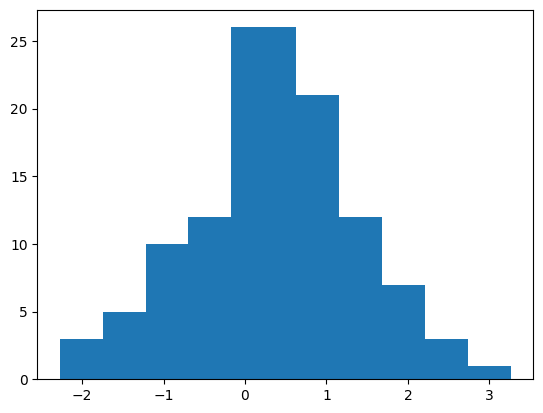

In [264]:
my_tensor = torch.randn((100))                      # randn: random values from  standard normal distribution

vals, bins = torch.histogram(my_tensor, bins=10)    # create histogram with 10 bins


# plot
import matplotlib.pyplot as plt
plt.bar(bins[1:], vals)

Matplotlib usually expects NumPy arrays, but it worked well above with Torch Tensors.

However, if you need to perform any calculations outside of PyTorch it is good practice to first
call `.numpy()` on the tensors.

---

## 2. Gradients and Autograd

At this point, you may ask why we have to work with yet another library and data type.

The reason for this is that PyTorch brings extra functionality that other libraries like NumPy do
not have, but which is extremely important for deep learning.

One of those is the automated calculation of gradients. You should remember from the lecture that
gradients are fundamental to training a deep learning model. Let us recap this briefly with the help
of an imaginary toy dataset.


**🌲 Toy example: tree age prediction**

Imagine the following question: given the measured height of a tree in metres, can you predict how
old it is?

Let us assume that you have gone around and measured the height of a few trees:

In [438]:
tree_heights = torch.tensor([40.0, 12.5, 18.6, 55.2, 34.9])         # tree heights in metres

By some means, you also know how old each one of the measured trees is:

In [439]:
tree_ages = torch.tensor([60, 32, 36, 92, 51])                      # tree ages in years

Let's plot this:

Text(0, 0.5, 'Tree age [y]')

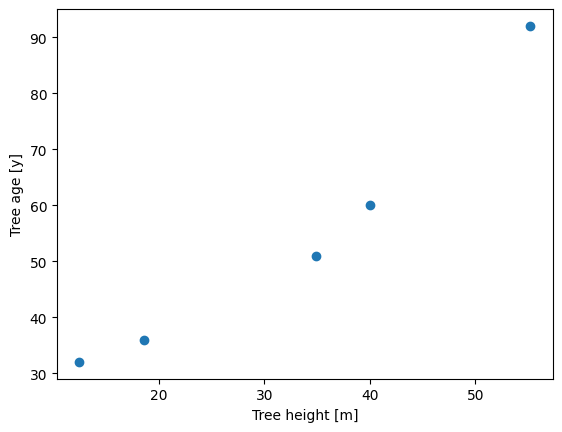

In [440]:
plt.scatter(tree_heights, tree_ages)
plt.xlabel('Tree height [m]')
plt.ylabel('Tree age [y]')

It probably would make sense to fit a linear model through this, right?

$$
\hat{y} = ax + b
$$

In other words, we could try and predict the tree age ($\hat{y}$) from the tree height ($x$).

Let's try one with some random values for model parameters $a$ and $b$:

Text(0, 0.5, 'Tree age [y]')

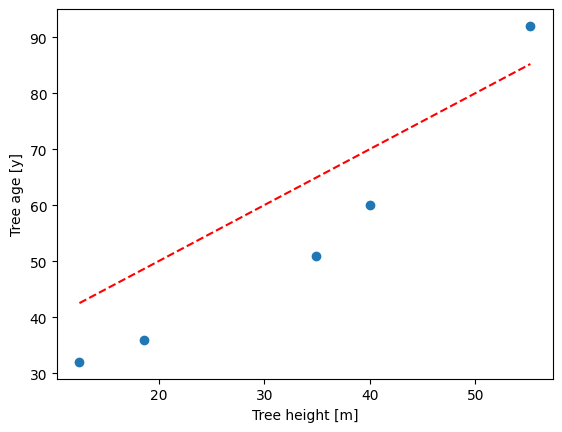

In [447]:
a = torch.tensor(1.0)                           # slope
b = torch.tensor(30.0)                          # intercept

# predict tree age across the range of heights with linear model y_hat = ax + b
x = torch.linspace(tree_heights.min(), tree_heights.max(), 100)
y_hat_init = a*x + b

plt.scatter(tree_heights.numpy(), tree_ages.numpy())
plt.plot(x, y_hat_init, 'r--')                       # plot prediction
plt.xlabel('Tree height [m]')
plt.ylabel('Tree age [y]')

Well, that's a start, but it doesn't really seem to work that well. How can we tell? By calculating
the **loss value**.

We're performing a regression here, so a viable loss would be the mean squared error (MSE):

$$
\mathcal{L}(\hat{y}, y) =  \frac{1}{N}\sum_{i=1}^{N}(\hat{y_i} - y_i)^2
$$

We can easily do this in PyTorch:

In [448]:
# predict tree age for all our data points, using initial guess of parameters a and b
y_hat = a * tree_heights + b

# calculate squared error for each data point
squared_error = (y_hat - tree_ages) ** 2
print(f'Squared error per data point:\n{squared_error}\n')

# calculate MSE (mean squared error across all data points)
mean_squared_error = torch.mean(squared_error)
print(f'Mean squared error: {mean_squared_error}')

Squared error per data point:
tensor([100.0000, 110.2500, 158.7600,  46.2400, 193.2100])

Mean squared error: 121.69200134277344


We're pretty off from the measured values, as you can see. How can we improve our model?

Well, we set the model parameters, $a$ and $b$, by ourselves, and they obviously aren't a good fit.
What if we could learn them based on our observations and measurements – like in a machine learning
model?

If you remember from the lecture, **gradients** (first-order derivatives) can tell us about the
direction of descent of a function. What if we calculated gradients for our loss function, the mean
squared error? This would tell us how to descend it, that is, to move towards a solution where the
MSE value is minimal.

Thus, if we could calculate the gradients of the loss function with respect to our learnable
parameters, $a$ and $b$, we could figure out how to adjust them so that the loss becomes minimal. In
other words, we could fit the model to the data!

To do so, we need to calculate the first-order derivative of our loss, MSE, with respect to the
prediction $\hat{y}$:
$$
\frac{\partial\mathcal{L}}{\partial\hat{y}} = \frac{1}{N}\sum_{i=1}^{N}2\hat{y_i} - 2y_i
$$


Read: the partial derivative of the loss $\mathcal{L}$ with respect to the prediction $\hat{y}$ is:
...

In [449]:
# calculate gradient (first-order derivative) of loss w.r.t. prediction y_hat
gradient = (2*y_hat - 2*tree_ages)

print(f'Gradient: {gradient.mean()}')

Gradient: 16.079998016357422


We now know the gradients of the loss $\mathcal{L}$ with respect to prediction $\hat{y}$. That is
interesting, but it doesn't yet tell us how to adjust model parameters $a$ and $b$. 

The reason for this is that we didn't just calculate the loss – we also first calculated the
prediction. Our ultimate function, from measured tree height to the loss, thus is the following:

$$
\mathcal{L}(\hat{y}, y) = \frac{1}{N}\sum_{i=1}^N ((ax_i + b) - y_i)^2
$$

We thus have to calculate gradients not just for the loss, but one step further back, through the
linear prediction $ax_i + b$.



Remember from the lecture that we can apply the chain rule for this:
$$
    p(q(x))' = p'(q(x)) * q'(x)
$$

Here, $q()$ is our prediction function ($\hat{y} = ax + b$) and $p()$ is our MSE loss.

The first-order derivatives of our prediction function w.r.t. $a$ and $b$ are:
$$
\frac{\partial\hat{y}}{\partial a} = x
$$
and:
$$
\frac{\partial\hat{y}}{\partial b} = 1
$$

If we put those pieces together in the chain rule, we can therefore obtain gradients for $a$ and
$b$ based on the loss value we got:

$$
\frac{\partial\mathcal{L}}{\partial a} = \frac{\partial\mathcal{L}}{\partial\hat{y}} * x
$$

and:
$$
\frac{\partial\mathcal{L}}{\partial b} = \frac{\partial\mathcal{L}}{\partial\hat{y}} * 1
$$

In [450]:
gradient_a = (gradient * tree_heights).mean()

print(f'Gradient for parameter a (slope):\t{gradient_a}')

gradient_b = (gradient * 1).mean()

print(f'Gradient for parameter b (intercept):\t{gradient_b}')

Gradient for parameter a (slope):	350.14398193359375
Gradient for parameter b (intercept):	16.079998016357422


Cool, we now know how we have to adjust $a$ a lot and $b$ a little bit. We also know in which
direction: both need to be adjusted negatively (remember that the _negative_ gradient tells us the
direct path to the loss minimum). If we now multiply our learnable parameters $a$ and $b$ with their
respective negative gradients, we should get a model that fits our dataset slightly better.

Gradients are often too large, and we usually want to reduce their magnitude (also so that single
data points don't have too much influence over others). We can do this with an attenuation factor,
also known as the **learning rate**:

In [451]:
learning_rate = 0.0005

# adjust model parameters a and b based on their gradients
a = a - gradient_a * learning_rate
b = b - gradient_b * learning_rate

Let's predict tree age again with our new parameters:

MSE loss for updated model: 99.38470458984375


Text(0, 0.5, 'Tree age [y]')

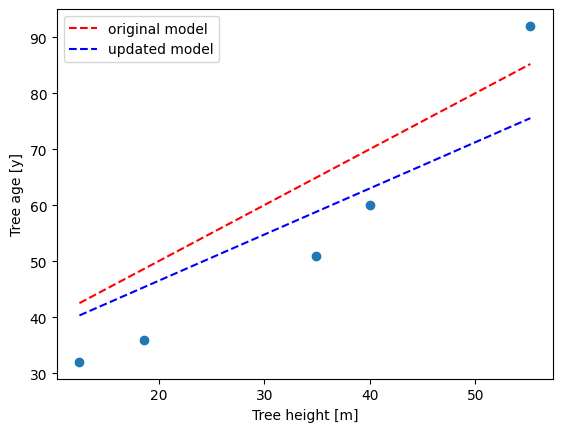

In [452]:
y_hat_new = a * tree_heights + b

# calculate MSE loss
mse_loss = torch.mean((y_hat_new - tree_ages)**2)
print(f'MSE loss for updated model: {mse_loss}')


# plot
x = torch.linspace(tree_heights.min(), tree_heights.max(), 100)
y_hat_new = a*x + b
plt.scatter(tree_heights.numpy(), tree_ages.numpy())
plt.plot(x, y_hat_init, 'r--', label='original model')      # prediction with initial parameters
plt.plot(x, y_hat_new, 'b--', label='updated model')        # with updated parameters
plt.legend()
plt.xlabel('Tree height [m]')
plt.ylabel('Tree age [y]')

That looks better overall! Our MSE loss has gone down, simply because we have calculated its
gradients and adjusted model parameters $a$ and $b$ accordingly. It's still not a perfect fit, but
we could repeat the fitting step a few times until the gradients become near-zero, at which point we
would have reached the optimum (convergence) and we would have a good prediction model.


But this procedure was very cumbersome. The above was just a simple linear model, imagine how
complicated this would become for a big deep learning model. Wouldn't it be nice if we didn't have
to calculate gradients and first-order derivatives ourselves?

That's exactly what modern deep learning frameworks like PyTorch offer: automated gradient
computation ([Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)). Let's
repeat the above experiment, but let PyTorch calculate gradients for us:

In [283]:
# define our initial model parameters again
a = torch.tensor(1.0, requires_grad=True)                           # slope
b = torch.tensor(30.0, requires_grad=True)                          # intercept

# obtain prediction
y_hat = a * tree_heights + b

# calculate MSE loss
loss = torch.mean((y_hat - tree_ages)**2)

# hmm, what's that?
loss.backward()

# let's see what PyTorch gives us for gradients:
print(f'Gradient for parameter a (slope):\t{a.grad}')
print(f'Gradient for parameter b (intercept):\t{b.grad}')

Gradient for parameter a (slope):	350.1439514160156
Gradient for parameter b (intercept):	16.079999923706055


Compare these values with the gradients we calculated manually above: they're identical!

The only steps we had to implement to get these values were:
1. Specify which tensors we wanted to calculate gradients for (`requires_grad=True`).
2. Call `.backward()` on the loss value.

In other words, by doing so, PyTorch automatically computes all relevant gradients for us with a
single line: it does the **backward pass** (or backpropagation) for us, with chain rule and
everything! This works for _any_ PyTorch function, because under the bonnet, all first-order
derivatives are implemented already for you.

Thus, if this section sounded a bit intimidating to you – don't worry! You will very, very likely
_never_ have to calculate or implement derivatives and gradients by yourselves. But I hope you now
understand how deep learning model training works. 🤓

---

## 3. From Functions to Layers

Well, it gets even cooler.

Above, we specified, and implemented, a linear operation manually:
```python
y_hat = a * tree_heights + b
```

If we have to do this for every computation in a deep learning model, it would get really annoying.

As you have seen in the lectures, deep learning models consist of _layers_ that each perform a
specific operation, such as a linear transformation or a non-linear activation function, on their
respective inputs.


PyTorch also helps us here, because it has many of the typical deep learning layers already built-in
and ready to use for you. All PyTorch layers are defined in the
[torch.nn](https://pytorch.org/docs/stable/nn.html) sub-package.

In [172]:
from torch import nn

As you can imagine, a linear prediction layer is implemented – it's the
[nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) layer.

To make use of it, we first have to create a new linear layer with its specifications:

In [173]:
linear_layer = nn.Linear(in_features=1, out_features=1)

The above object we created is a linear layer that accepts a single feature as input
(`in_features=1`) and returns a single prediction value as output (`out_features=1`).


💡 You can imagine what happens if you change these hyperparameters:
* Setting `in_features` greater than 1 results in a _multivariate_ linear regression.
* Setting `out_features` greater than 1 results in _multiple_ linear regressions.


We can apply the layer we just defined above on a tensor to obtain a prediction:

In [177]:
# obtain prediction with newly created linear layer
y_hat = linear_layer(tree_heights.unsqueeze(-1))

print(f'Output of linear layer:\n{y_hat}')

Output of linear layer:
tensor([[32.3906],
        [10.7240],
        [15.5301],
        [44.3662],
        [28.3724]], grad_fn=<AddmmBackward0>)


You may notice two quirks here:
1. We had to call `.unsqueeze(-1)` on the input. This is because the linear layer expects an input
   tensor of size $B\times N$. Here, $B$ is the batch size (the number of data points) and $N$ is
   the number of features. In our case, we have five data points and only one feature (tree height),
   so we need to reshape the tensor into size $5\times1$.
2. The output of the layer seems to contain just random values. That is because the layer's model
   parameters, $a$ and $b$, are initialised randomly when a new layer is created. We can access
   these and verify that the calculations are correct:

In [179]:
# get weight (a) and bias (b) from linear layer and calculate output manually (for verification)
y_hat_manual = linear_layer.weight * tree_heights + linear_layer.bias

print(f'Manual calculation of output, with layer parameters:\n{y_hat_manual}')

Manual calculation of output, with layer parameters:
tensor([[32.3906, 10.7240, 15.5301, 44.3662, 28.3724]], grad_fn=<AddBackward0>)


💡 In deep learning jargon, "weight" is the same as slope and "bias" is the intercept (in a linear
model).

Take a brief look at the [torch.nn](https://pytorch.org/docs/stable/nn.html) package to see what
kind of layers PyTorch comes with already built-in.

For example, we also have non-linear **activation functions**:

In [185]:
sigmoid_layer = nn.Sigmoid()        # sigmoid: y_hat = 1/(1+exp(-x))
relu_layer = nn.ReLU()              # rectified linear unit: y_hat = max[0, x]


random_tensor = torch.randn((5))
print(f'Tensor values:\n{random_tensor}\n')
print(f'After sigmoid:\n{sigmoid_layer(random_tensor)}\n')
print(f'After ReLU:\n{relu_layer(random_tensor)}\n')

Tensor values:
tensor([-1.0737,  2.0800,  0.7738, -1.1704, -0.6915])

After sigmoid:
tensor([0.2547, 0.8889, 0.6843, 0.2368, 0.3337])

After ReLU:
tensor([0.0000, 2.0800, 0.7738, 0.0000, 0.0000])



Note how sigmoid transforms everything into the $[0,1]$ range and ReLU truncates all values at zero,
exactly as we would expect.

---

## 4. From Layers to Neural Networks

From the above, it should be clear how we can construct a deep learning model: by creating, and
applying, various linear and non-linear layers in a pre-defined sequence.

And again, PyTorch has an ace up its sleeve for us here.

Note how every layer performs a specific operation. To do so, it is _callable_, that is, you can
give it an input and it returns an output. Isn't an entire artificial neural network the same?

PyTorch implements this by defining a _base class_, `nn.Module`, which offers exactly that and can
be specified as a layer, a series of layers, or anything else you like – including an entire model!
Thus, we can create our own variants of `nn.Module` that do whatever we want, be it perform an
operation as part of a single neural network layer, or an entire network itself.

Let us define a small artificial neural network as an `nn.Module` now.

In [186]:
class MyModel(nn.Module):

    def __init__(self, in_features, num_classes):
        super().__init__()

        # define model's layers here
        self.linear1 = nn.Linear(in_features, 16)
        self.sigmoid = nn.Sigmoid()

        self.linear2 = nn.Linear(16, 32)
        self.linear3 = nn.Linear(32, num_classes)


    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)

        x = self.linear2(x)
        x = self.sigmoid(x)

        return self.linear3(x)

A lot is going on above:
* Keyword `class` denotes an object **definition**, a blueprint of what `MyModel` looks like. It
  specifies the properties of `MyModel` and what it can do (functions), but
  _not_ its actual values (_e.g._, weights and biases of the layers).

* Function `__init__` is the object class **constructor**: this method is called whenever you
  _initialise_ a new _instance_ of `MyModel`. Here, you define the model's properties, such as its
  layers.

* Finally, function `forward` is required by the `nn.Module` _base class_ and defines the _forward
  pass_, _i.e._, how `MyModel` predicts an output based on a given input. Note the function has two
  input arguments: `self`, which is a reference to the current instance of `MyModel` and allows you
  to access its properties (_e.g._, layers), and `x`, which is the input tensor. The function
  eventually must `return` an output tensor.


This concept is called **object-oriented programming** (OOP): you define an object _class_ (the
blueprint) that specifies the class' own properties (weights, biases, anything else you need) as
well as functions (forward(), _etc._), and then you can initialise an object _instance_ from it.
OOP isn't exclusive to PyTorch – you have seen it already without knowing it! Remember last
week when you constructed _e.g._ a Random Forest classifier and specified properties like number of
trees, before you could call .fit(X, y) on it? Well, you constructed an object instance of
RandomForestClassifier with hyperparameters and then called its `fit` function to train it. Neat!

In fact, OOP isn't even exclusive to Python – it plays a big role in many other languages. But we
don't need to go into much more detail about it here; this is computer science territory.



As-is, the class definition of `MyModel` above is not complete. Please implement the remaining
parts:

🖌️ Implement an artificial neural network with the following architecture:
  1. Linear (fully-connected), mapping from input tensor of dimension `in_features` to 16 output
     dimensions.
  2. Sigmoid
  3. Linear, mapping from 16 input to 32 output dimensions.
  4. Sigmoid
  5. Linear, mapping from 32 input to `num_classes` output dimensions.

💡 As you can see, the model's `__init__` function already has the first layer defined:
`self.linear1 = nn.Linear(...)`. This is an example of how to define a property of `MyModel`. You
can initialise this and the other layers in such fashion here.

💡 Likewise, the `forward` function already contains a return statement, although this currently
just returns the input `x`. Here, you need to apply the layers to the input `x`, or else the
previous layer's output, in the correct order.

Let us test the model now:

In [289]:
batch_size = 4
input_ndim = 5
num_classes = 6

# create random input tensor
my_tensor = torch.randn((batch_size, input_ndim))


# initialise an instance of MyModel that you have defined above
my_model = MyModel(input_ndim, num_classes)


# apply model instance on input tensor (obtain prediction; forward pass)
pred = my_model(my_tensor)

# the following lines test whether your model output is a Tensor with correct size
assert isinstance(pred, torch.Tensor), \
    f'Incorrect implementation: your model should return a torch.Tensor, but it returned {pred}.'
assert pred.dim() == 2 and (pred.size(0) == batch_size and pred.size(1) == num_classes), \
    'Incorrect implementation: your model should return a tensor of size ' + \
    f'{batch_size}x{num_classes}, but it returned {pred.size()}.'

print(f'Output size: {pred.size()}')

print(f'Output values:\n{pred}')

Output size: torch.Size([4, 6])
Output values:
tensor([[-0.0825,  0.5443, -0.5272,  0.6464, -0.5320,  0.1713],
        [-0.1029,  0.5134, -0.5135,  0.6133, -0.5403,  0.1588],
        [-0.0915,  0.5394, -0.5204,  0.6298, -0.5343,  0.1654],
        [-0.0854,  0.5369, -0.5269,  0.6489, -0.5335,  0.1654]],
       grad_fn=<AddmmBackward0>)


What are those outputs? They look a bit weird, don't they?

It says that the size of the model output is $4\times6$. If you check the code carefully, you will
see that this corresponds to our batch size of 4 (_i.e._, four data points) and the number of
classes being 6. Why do we get so many outputs, and not just four values?

Lots of machine learning is based on _probabilities_. Most ML models don't just
predict the most likely label class, but also provide some form of **confidence**. For example, a
random forest will tell you how many of its trees predicted the most frequent class; if 3 out of 5
trees predicted the same class, the model confidence is 3/5 = 60% for the predicted class.

Deep learning does exactly the same; it can give us confidences for all outputs and all classes. But
the above values don't look like confidences, right? These are raw model outputs, also known as
**logits**.

Remember from the lecture that we need a final activation function for classification, known as the
**softmax**. Watch what happens if we apply softmax on these outputs:

In [191]:
pred_softmax = torch.softmax(pred, dim=1)           # apply softmax along second (class) dimension

print(f'Output values after softmax:\n{pred_softmax}')

Output values after softmax:
tensor([[0.1634, 0.1819, 0.1643, 0.1405, 0.2044, 0.1455],
        [0.1623, 0.1805, 0.1658, 0.1396, 0.2056, 0.1461],
        [0.1632, 0.1794, 0.1634, 0.1414, 0.2081, 0.1445]],
       grad_fn=<SoftmaxBackward0>)


If we sum these values along the second dimension, _i.e._, along all the label classes individually
for each data point, we get:

In [192]:
print(f'Softmax-activated values summed along label dimension:\n{pred_softmax.sum(1)}')

Softmax-activated values summed along label dimension:
tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)


All ones! In other words, thanks to softmax, we now have something like probabilities for each class
and each data point that we can use: a softmax-activated output value of 0 means "zero probability
that it's this class", and 1 means that the model is 100% sure about the class.

The predicted class then becomes the position (index) of the largest predicted probability:

In [193]:
y_hat = pred.argmax(dim=1)          # argmax: take the argument (position) that has maximum value

print(f'Arg max:\n{y_hat}')

Arg max:
tensor([4, 4, 4])


Of course, we have to know which class is at which position (we can't expect the model to return
class names). The same applies for our target/ground truth labels, $y$.

Cool, we now have a deep learning model that, given a number of input points with certain number of
features, predicts an output for a specified number of classes. We can make predictions!

Let's talk about the remaining ingredients required to train such a model, so that we can apply it
to a real dataset.

---

## 5. Model Training

### 5.1 Loss Function

To train a deep learning model, we need to have a criterion, a measure of how good its prediction is
with respect to a _target_ (label, ground truth). This is the **loss function**. Above, you have
seen the mean squared error (MSE) for regression.

You may remember from the lecture what we use for classification: the cross-entropy loss. You may
also remember that we can technically represent a loss function just like another layer. Thus, it
probably makes sense to also implement it as a `torch.nn` object class that we can call on inputs,
right?

PyTorch does exactly that: see the
[documentation](https://pytorch.org/docs/stable/nn.html#loss-functions) for loss functions. Below,
we will take a look at
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
accordingly.

In [196]:
# create Cross-Entropy Loss object instance (from the torch.nn sub-package)
criterion = nn.CrossEntropyLoss()

# define random tensor of targets (ground truth label indices) for demonstration purposes
target = torch.randint(low=0,
                       high=num_classes,
                       size=(batch_size,))

loss = criterion(pred, target)
print(f'Loss: {loss:.2f}')

Loss: 1.74


💡 CrossEntropyLoss takes the **raw model output** (logits) as input, NOT the softmax-activated
ones. It applies softmax by itself.

### 5.2 Backpropagation

Remember Autograd, the automated gradient computation, from Section 2 above? Let's use it on our
loss value:

In [197]:
loss.backward()

And, just like that, gradients are calculated.



💡 We can only call `.backward()` once (try running the above cell a second time if you want to see
what happens). This is a security feature that prevents you from calculating gradients twice,
inflating the learning signal.

### 5.3 Optimiser

After calling `loss.backward()`, we now have gradients for each model parameter. Now, we need to
apply the gradients to actually adjust the parameters.

In Section 2 above, we have done this manually. This was a very crude way of doing it and not
realistic to use. Instead, you may remember from the lecture that we can use an extra entity for
this, known as the **optimiser**.

Multiple optimiser types have been proposed, and PyTorch has a pretty complete set of the common
ones. The most basic (and widely useful) is _stochastic gradient descent_ (SGD).

🖌️ Read the [SGD documentation](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) and
initialise an optimiser instance for the model instance (`my_model`) we defined above by completing
the code cell below.

In [198]:
from torch.optim import SGD         # import stochastic gradient descent from subpackage


# create instance of SGD
optimiser = SGD(my_model.parameters(),
                lr=0.01)

We can then use this optimiser to modify all learnable model parameters.

### 5.4 Training Iteration

Putting all pieces together, this is one training step for a deep learning model:

In [ ]:
# predict (forward pass)
pred = my_model(my_tensor)

# calculate loss
loss = criterion(pred, target)

# reset any gradients to zero calculated before
optimiser.zero_grad()

# backward pass
loss.backward()

# apply gradients: modify model parameters to better fit target
optimiser.step()

And that's it!

Of course, all the other ML principles we have seen last week, including train/val/test split,
under-/overfitting, hyperparameter tuning, _etc._, apply to deep learning models as well. We'll see
this further down below.

---

## 6. Model Loading and Saving

Once you have trained a model that you like, you may want to save it to disk and be able to re-use
it later for prediction.

PyTorch allows us to do that very easily:

In [ ]:
# extract model parameters
model_state = my_model.state_dict()

# save parameters to file
with open('model_state.pt', 'wb') as f:
    torch.save(model_state, f)

# to load model parameters again for a new model
my_model = MyModel(input_ndim, num_classes)             # create new model instance first

with open('model_state.pt', 'rb') as f:
    model_state = torch.load(f)
    my_model.load_state_dict(model_state)               # load trainable parameters from file

💡 Tips and tricks:
- The `wb` and `rb` indicate "write binary file" and "read binary file", respectively.
- You do have to know how to initialise a new model instance before loading saved parameters. For
  example, in the model above, `input_ndim` and `num_classes` must have _exactly_ the same values as
  the original model you saved – you cannot just "invent" a new label class, for example.
- Likewise, the class definition of `MyModel` must be the same.
- You can save multiple parameters to an output, for example with a `dict` file.


---

## 7. Exercise: Species Distribution Modelling with Deep Learning

We now have pretty much all parts together to train a deep learning model for real! 😃

Let us use the same dataset we have used last week, where we try to predict which species we can
observe in space based on environmental features. The code block below loads the data and is
identical to the one from last week:

In [293]:
import pandas as pd

# load observations
obs = pd.read_csv('https://raw.githubusercontent.com/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/refs/heads/main/data/north_american_mammals/locations.csv')

# load covariates (which we will use as input features)
cov = pd.read_csv('https://raw.githubusercontent.com/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/refs/heads/main/data/north_american_mammals/covariates.csv')

# join them together
data = pd.merge(obs, cov, on='id')

# remove invalid (NaN) values
data = data.dropna()

# keep track of all covariate names
cov_cols = list(frozenset(cov.columns).difference(frozenset(['id', 'lon', 'lat', 'species'])))

# show the first few rows
data.head()

,lon,lat,species,id,meanAnnualTemp,seasonalityPrecip,cloudCoverAnnualVar,topoRugged,summerEVI,winterEVI,siltContent,clayContent,sandContent
0,-109.900000,49.583300,Lasiurus_cinereus,1414132141,2771.0,554.0,1072.206177,12.412183,3860.713379,965.195984,416.467102,261.975586,321.557312
1,-98.081754,19.694223,Lasiurus_cinereus,1418533465,2851.0,733.0,2087.228271,25.450399,3647.154541,2764.679199,301.668488,197.310333,501.021179
2,-105.994193,25.955892,Lasiurus_cinereus,1422088335,2863.0,1040.0,1751.061401,38.998798,2666.125488,1870.845703,235.642242,274.923248,489.434509
3,-99.555278,18.591944,Lasiurus_cinereus,1418249950,2934.0,1029.0,1398.814087,19.568239,4849.710449,2400.386230,231.096497,357.820496,411.083008
4,-104.017754,25.278463,Lasiurus_cinereus,1422086748,2959.0,938.0,823.457153,1.363760,4358.366211,2182.718506,332.975037,240.049637,426.975342


Now, things start to change a bit. Remember that we cannot feed a species name like
"Lasiurus_cinereus" into a deep learning model. We need to convert names to ordinals (integer
numbers from 0) instead, so that each data point with the same species gets assigned the same
ordinal. For example:

```
"Lasiurus_cinereus" --> 0
"Ammospermophilus_leucurus" --> 1
...
```

If we keep this assignment the same throughout, we will know that a point with observed species
"Ammospermophilus_leucurus" will have a ground truth label of 1, and the model output at position 1
will encode the logits (or confidence, with softmax) for the same species.


🖌️ Implement the conversion to ordinals below. You will have to append a new column
"species_ordinal" to the dataframe, and also store the order of species in a second variable called
`species_order`. Tip: take a look at
[Pandas.factorize](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html).

In [294]:
species_ordinals, species_order = pd.factorize(data['species'])

data['species_ordinal'] = species_ordinals

Next, we need to standardise our covariate/input feature values. At the moment, their magnitude
varies massively (summerEVI goes beyond 3,000, while topoRugged is below 100). You can imagine
that gradients calculated for big values can easily overpower those for small ones. To facilitate
training, we will thus apply z-score normalisation, same as we have seen last week: $$\hat{x} =
\frac{x - mean(x)}{std(x)}$$

In [295]:
data[cov_cols] = (data[cov_cols] - data[cov_cols].mean()) / data[cov_cols].std()

Next, we need to split the data into training, validation, and test sets. We'll use 60% for training, 10% for validation, and 30% for testing.

You should remember this from last week's exercise.

In [296]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data,
                                         test_size=0.4,
                                         stratify=data['species'],
                                         random_state=42)
data_train, data_val = train_test_split(data_train,
                                        test_size=0.16,
                                        stratify=data_train['species'],
                                        random_state=42)

We can now separate the three datasets into their respective input features $\mathbf{X}$ and target labels $\mathbf{y}$. Crucially, these need to be `torch.Tensor` instances.

In [297]:
X_train = torch.from_numpy(data_train[cov_cols].to_numpy()).float()
y_train = torch.from_numpy(data_train['species_ordinal'].to_numpy()).long()

X_val = torch.from_numpy(data_val[cov_cols].to_numpy()).float()
y_val = torch.from_numpy(data_val['species_ordinal'].to_numpy()).long()

X_test = torch.from_numpy(data_test[cov_cols].to_numpy()).float()
y_test = torch.from_numpy(data_test['species_ordinal'].to_numpy()).long()

Again, remember that we need data (`X`) in 32-bit float (`.float()`) and label ordinals (`y`) in
long integer (`.long()`) format.



Datasets used to train deep learning models are usually very large, and input features very big
(_e.g._, images). We often cannot fit the entire dataset into memory. Therefore, we often train deep
learning models in **minibatches**, that is, we randomly load a fixed number of data points (_e.g._,
32) at a time and calculate and apply gradients for those only.

Our dataset here isn't really big and would fit into memory, but it's still good practice to train
in batches here, too. Plus, it gives us the opportunity to talk about a final piece of the puzzle:
[Datasets and DataLoaders](https://pytorch.org/docs/stable/data.html).

These are helpers that allow us to load big datasets in batches efficiently. Let us first implement
our own Dataset class:

In [298]:
from torch.utils.data import Dataset


class MyDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx,:], self.y[idx]

As you can see, `MyDataset` offers two key functions, `__len__` and `__getitem__`. The first one
returns the number of data points we have, and the second returns our two properties for the data
point at position `idx`, that is, its features `X` and label `y`.

We can now create instances of `MyDataset` for our training and validation sets:

In [228]:
dataset_train = MyDataset(X_train, y_train)
dataset_val = MyDataset(X_val, y_val)

This might seem overkill for our purpose, but it is very useful for large datasets and complex
inputs like images, as explained. For example, you can create a Dataset class that receives a list
of 10,000 image paths, and only decide to actually load the image from disk once `__getitem__` is
called. This is much, much more memory-efficient than loading all the images in advance.

Function `__getitem__` only returns a single item, the one at position `idx`. But we need them in
minibatches, right? This job is done by the DataLoader:

In [422]:
from torch.utils.data import DataLoader


BATCH_SIZE = 8      # the DataLoader assembles the minibatches, so we define their sizes here


dataloader_train = DataLoader(dataset_train,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

dataloader_val = DataLoader(dataset_val,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

Notice that we set `shuffle=True` for the training DataLoader. This randomises the elements that get
put together into a minibatch for each epoch, which improves model training.

We can then iterate over each DataLoader instance to obtain our minibatches:

In [423]:
for X, y in dataloader_train:
    print(f'Size of X: {X.size()}.')
    print(f'Size of y: {y.size()}')

    print(f'Values of X:\n{X}\n')
    print(f'Values of y:\n{y}\n')
    break       # abort loop after first iteration (for demonstration purposes only)

Size of X: torch.Size([8, 9]).
Size of y: torch.Size([8])
Values of X:
tensor([[ 0.6765,  0.2913, -1.0423, -0.3194,  0.4669, -1.8917, -1.5682,  1.7509,
         -1.1939],
        [ 0.1959,  1.5871, -2.9112, -0.6669,  1.2419, -2.1573, -0.1323,  3.2178,
         -0.6116],
        [ 1.6033,  0.6092,  0.5994, -0.5908,  1.1324,  1.7517, -1.2403, -1.3620,
         -1.2316],
        [ 0.2577, -0.7844,  0.0670,  2.9215,  0.1271, -0.1506, -1.1781,  0.0331,
         -0.5018],
        [-0.2574, -0.6866, -0.1173,  0.5631,  0.1362, -0.0912, -1.0743,  0.1320,
          0.2142],
        [-0.1857,  1.8193, -3.2514, -0.6949,  1.0741, -2.1933,  0.2993,  3.4783,
          0.4405],
        [-0.3347, -0.3199, -1.6234,  0.6800,  0.9772, -1.8719,  1.3742,  2.1522,
          0.8834],
        [ 0.8072,  0.3769,  0.5175, -0.3862,  1.1465,  0.2323,  0.7019, -0.4911,
          1.0615]])

Values of y:
tensor([6, 9, 9, 4, 2, 9, 2, 7])



Sure enough, we get an input feature tensor `X` of size $8\times9$ (batch size times number of
features), and a label tensor `y` of size 8 (batch size). We can use that to train and test our
model!

We now have our data ready, so the next step is to create our model. We will reuse our
implementation of `MyModel` above.

🖌️ Initialise a new instance of `MyModel` with the right properties (_i.e._, number of input
features and number of output classes). You can calculate these from `X_train` and `species_order`
accordingly. You can copy-paste and re-define your `class MyModel(nn.Module):` below for
modifications afterwards if you want.

In [424]:
class MyModel(nn.Module):

    def __init__(self, in_features, num_classes):
        super().__init__()

        # define model's layers here
        self.linear1 = nn.Linear(in_features, 16)
        self.sigmoid = nn.Sigmoid()

        self.linear2 = nn.Linear(16, 32)
        self.linear3 = nn.Linear(32, num_classes)


    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)

        x = self.linear2(x)
        x = self.sigmoid(x)

        return self.linear3(x)


# create model instance
my_model = MyModel(in_features=X_train.size(1),
                   num_classes=len(species_order))

🖌️ Next, initialise all the other elements we need: optimiser, criterion/loss function.
For the optimiser, start with a learning rate of 0.001 and no other hyperparameters.

In [425]:
optimiser = SGD(my_model.parameters(),
                lr=0.001)

criterion = nn.CrossEntropyLoss()

Finally, let us implement the training loop, where we train the model for a given number of epochs.

During each epoch, gradients get calculated for the training data and model parameters adjusted by
the optimiser. As a result, the model is supposed to get a little bit better after each epoch on the
training set, measured by the loss value going down. During each epoch, we can also do two more
things:
1. Calculate classification accuracy in addition to the loss value;
2. do the same (calculation of loss and accuracy) for the validation set to test for overfitting.

Thus, it is common practice to design a training routine as follows:


```
for epoch in num_epochs:
    for X, y in training data loader:
        # 1. predict (forward pass)
        # 2. calculate loss
        # 3. set any previously computed gradients to zero (zero_grad)
        # 4. backward pass
        # 5. apply gradients to model parameters with learning rate (optimiser step)
        # 6. calculate accuracy
    
    for X, y in validation data loader:
        # 1. predict (forward pass)
        # 2. calculate loss
        # 3. calculate accuracy
```


🖌️  Let us implement this now. Complete the code cell below to do so.

In [426]:
def train_model(model,
                optimiser,
                dataloader_train,
                dataloader_val,
                num_epochs):

    # prepare lists for overall training and validation loss and accuracy values per epoch
    loss_train, loss_val = [], []
    accuracy_train, accuracy_val = [], []


    # iterate over epoch
    for epoch in range(num_epochs):

        # training
        model.train()            # see explanation below about this line

        # we will accumulate loss and accuracy values over the minibatches here
        loss_train_epoch, accuracy_train_epoch = 0.0, 0.0

        # iterate over training DataLoader instance, that is, over all the minibatches
        for X, y in dataloader_train:

            # prediction (forward pass)
            y_hat = model(X)

            # calculation of loss value
            loss = criterion(y_hat, y)

            # set gradients to zero
            optimiser.zero_grad()

            # backward pass
            loss.backward()

            # apply gradients to model parameters
            optimiser.step()

            # calculate overall accuracy
            accuracy = torch.mean((y_hat.argmax(1) == y).float())

            loss_train_epoch += loss.item()
            accuracy_train_epoch += accuracy.item()

        # append averaged statistics
        loss_train.append(loss_train_epoch / len(dataloader_train))
        accuracy_train.append(accuracy_train_epoch / len(dataloader_train))


        # validate
        model.eval()             # see explanation below about this line

        loss_val_epoch, accuracy_val_epoch = 0.0, 0.0

        for X, y in dataloader_val:
            with torch.no_grad():       # ditto
                y_hat = model(X)
                loss = criterion(y_hat, y)
                accuracy = torch.mean((y_hat.argmax(1) == y).float())
                loss_val_epoch += loss.item()
                accuracy_val_epoch += accuracy.item()
        loss_val.append(loss_val_epoch / len(dataloader_val))
        accuracy_val.append(accuracy_val_epoch / len(dataloader_val))

    # return the trained model and training statistics at the end
    return model, loss_train, loss_val, accuracy_train, accuracy_val

💡 Infos:
- Functions `my_model.train()` and `my_model.eval()` put the model into training, respectively
  evaluation/prediction mode. This is very important because some deep learning layers may behave
  differently during training compared to validation. We will see examples of this next week.
- Autograd, PyTorch's gradient computation engine, needs to keep track of all the history of
  functions applied to a tensor to be able to calculate gradients. To do so, it creates a
  computation _graph_ by default. This can be rather expensive, both computation- and memory-wise.
  If we only want to make predictions, we don't need such a graph, because we will never compute
  gradients. Therefore, we can place any operation where we don't need gradients under `with
  torch.no_grad():`, which makes things easier and more lightweight.


After having completed the above code cell, execute it. Then, let us plot the loss and overall
accuracy values over the epochs:

Let's call the function to train the model:

In [429]:
NUM_EPOCHS = 5

my_model, loss_train, loss_val, accuracy_train, accuracy_val = train_model(my_model,
            optimiser,
            dataloader_train,
            dataloader_val,
            NUM_EPOCHS)

Plot the result:

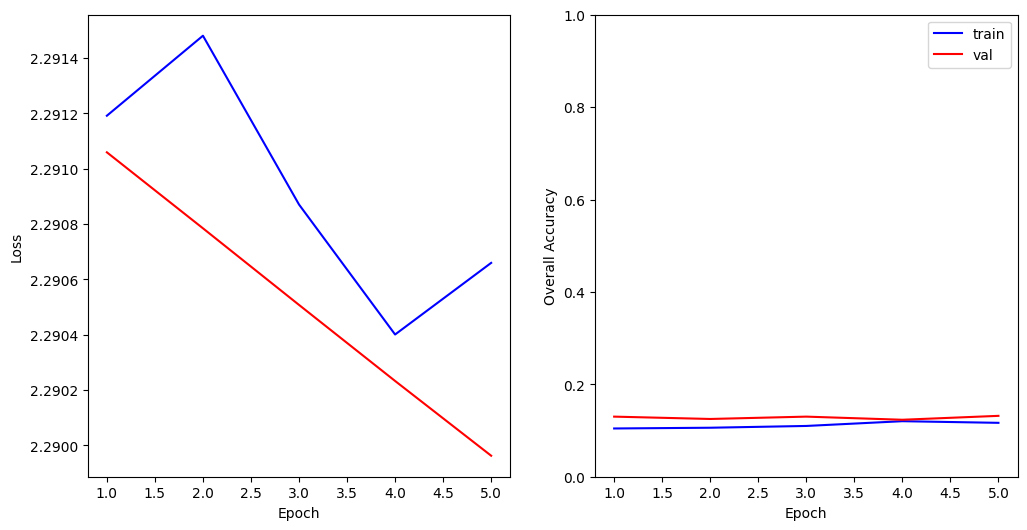

In [430]:
def plot_result(loss_train, loss_val, accuracy_train, accuracy_val):
    epochs = np.arange(1, len(loss_train)+1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train, 'b-', label='train')
    plt.plot(epochs, loss_val, 'r-', label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy_train, 'b-', label='train')
    plt.plot(epochs, accuracy_val, 'r-', label='val')
    plt.ylim([0, 1])
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Overall Accuracy')


plot_result(loss_train, loss_val, accuracy_train, accuracy_val)

If you started with the recommended configuration, you might notice two things:
1. The training and validation loss curves are going down overall, which means that the model seems
   to be learning something; nice!
2. The overall accuracy is very low, though, even at the 5th epoch.


Well, the loss going down is encouraging, but you see that it hasn't really reached a plateau at the
end of training. Remember that gradient descent is an iterative process, adjusting the parameters
just a little bit each time. Maybe training hasn't _converged_ yet, and we need to train for longer?


🖌️ Increase the number of epochs to 100 below. Re-train the model.

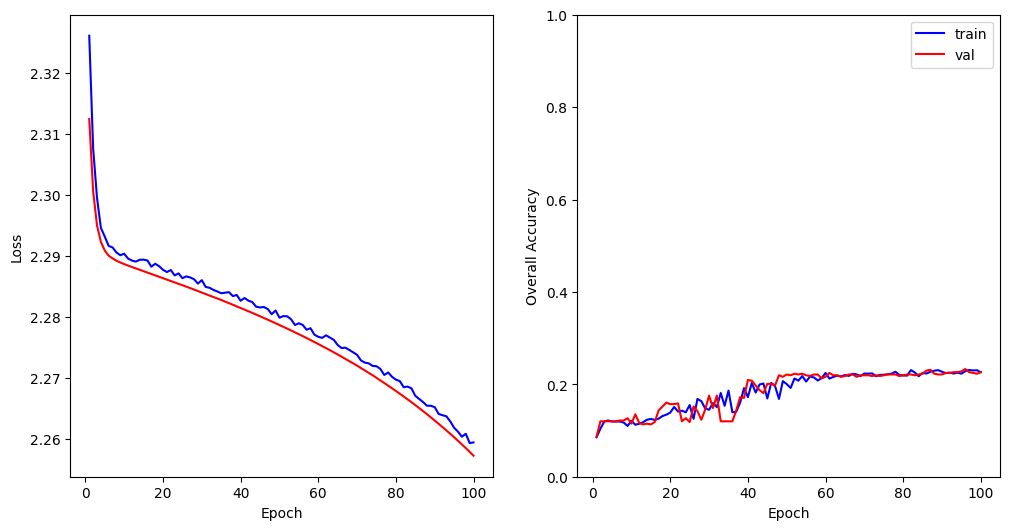

In [431]:
# re-initialise model instance and optimiser – this is important so that you can start anew
my_model = MyModel(in_features=X_train.size(1),
                   num_classes=len(species_order))

optimiser = SGD(my_model.parameters(),
                lr=0.001)

# train model
NUM_EPOCHS = 100                    # new number of epochs

my_model, loss_train, loss_val, accuracy_train, accuracy_val = train_model(my_model,
            optimiser,
            dataloader_train,
            dataloader_val,
            NUM_EPOCHS)

# plot training stats
plot_result(loss_train, loss_val, accuracy_train, accuracy_val)

Okay, that took a bit longer, but now the loss curves have gone down a lot more. But the accuracy is
still terrible. The dataset isn't the problem (remember we were able to
train _e.g._ a random forest with up to 60% accuracy last week), so perhaps the hyperparameters are
the culprit.

As you can imagine, there is no "single" deep learning model, but a seemingly infinite number of
ways to design, and train, such models. Each of these design choices can be seen as a
hyperparameter.

Let us try and improve performance now. We'll start with the simplest: the learning rate. Remember
from the lecture that too small learning rates can "trap" the model in a local, suboptimal minimum;
the gradient signal isn't strong enough to overcome small hills in the loss function anymore. Maybe
that's the problem?

🖌️ Increase the learning rate from 0.001 to 0.1. Re-train the model.

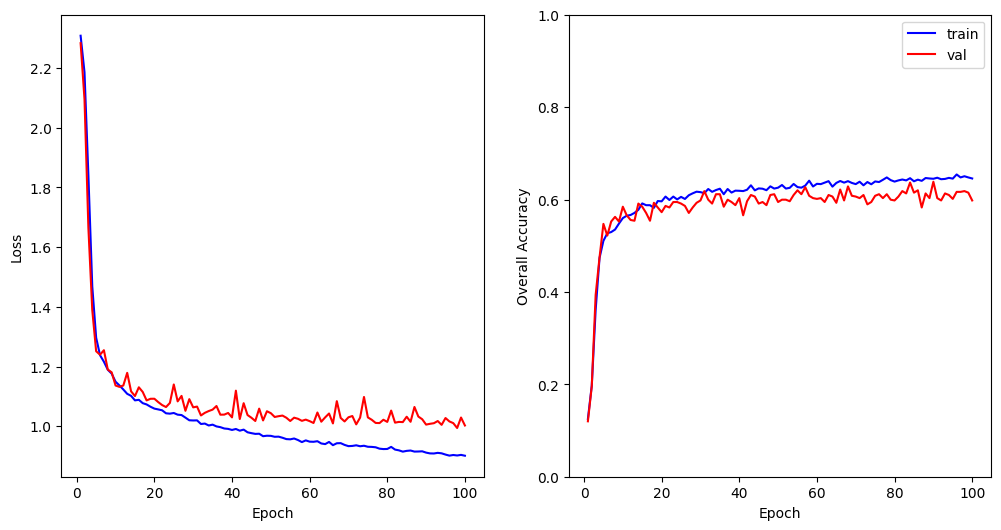

In [432]:
# re-initialise model instance and optimiser – this is important so that you can start anew
my_model = MyModel(in_features=X_train.size(1),
                   num_classes=len(species_order))

optimiser = SGD(my_model.parameters(),
                lr=0.1)                         # new learning rate

# train model
NUM_EPOCHS = 100

my_model, loss_train, loss_val, accuracy_train, accuracy_val = train_model(my_model,
            optimiser,
            dataloader_train,
            dataloader_val,
            NUM_EPOCHS)

# plot training stats
plot_result(loss_train, loss_val, accuracy_train, accuracy_val)

At this point, your overall accuracy should have shot up to around 60% – awesome! We indeed got
trapped in a local minimum before.

But the loss and accuracy curves appear rather squiggly, jumping up and down (especially for the
validation set). The model seems to oscillate.

Remember how we're creating minibatches of multiple data points? If they all pull into different
directions (in terms of gradients), then the model gets "thrown around" and cannot find a good
consensus to adjust its parameters to. We can "iron out" those minute differences across points by
adding more of them at a time – in other words, by increasing the size of the minibatches.

🖌️ Increase the batch size to 64 and re-train the model below. You will have to re-initialise the
training and validation set data loaders accordingly.

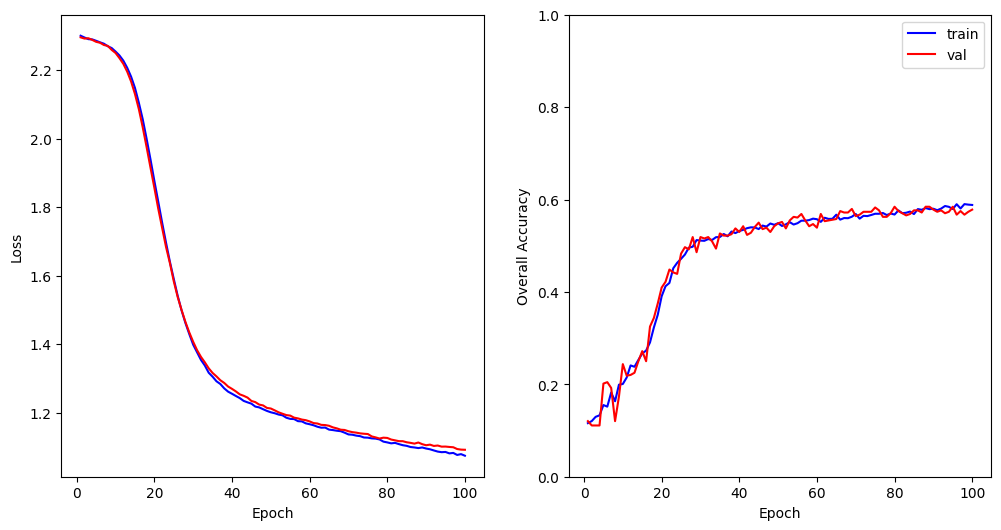

In [435]:
# re-initialise data loaders with new batch size
BATCH_SIZE = 64         # new value

dataloader_train = DataLoader(dataset_train,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

dataloader_val = DataLoader(dataset_val,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

# re-initialise model instance and optimiser – this is important so that you can start anew
my_model = MyModel(in_features=X_train.size(1),
                   num_classes=len(species_order))

optimiser = SGD(my_model.parameters(),
                lr=0.1)                         # new learning rate

# train model
NUM_EPOCHS = 100

my_model, loss_train, loss_val, accuracy_train, accuracy_val = train_model(my_model,
            optimiser,
            dataloader_train,
            dataloader_val,
            NUM_EPOCHS)

# plot training stats
plot_result(loss_train, loss_val, accuracy_train, accuracy_val)

That's better.



However, you might notice that the training loss (blue) is slightly lower than the validation loss
(red) towards the end of the training. This difference is not a problem at all, but too much of it
and we have an overfitting problem.

Remember how to combat overfitting? One way to do so is weight decay, which shrinks the model's
learnable parameters towards zero. This has the effect that the model cannot make crazy outlandish
predictions anymore, but has to find a "mean" consensus, even if single data points in the training
set tell it differently (through large gradient values). As with the learning rate, we can control
how much we want the weights to decay, so it's another hyperparameter.

We can apply weight decay via the optimiser. Let's try it.

🖌️ Add weight decay of 0.001 to the optimiser. Re-train the model.

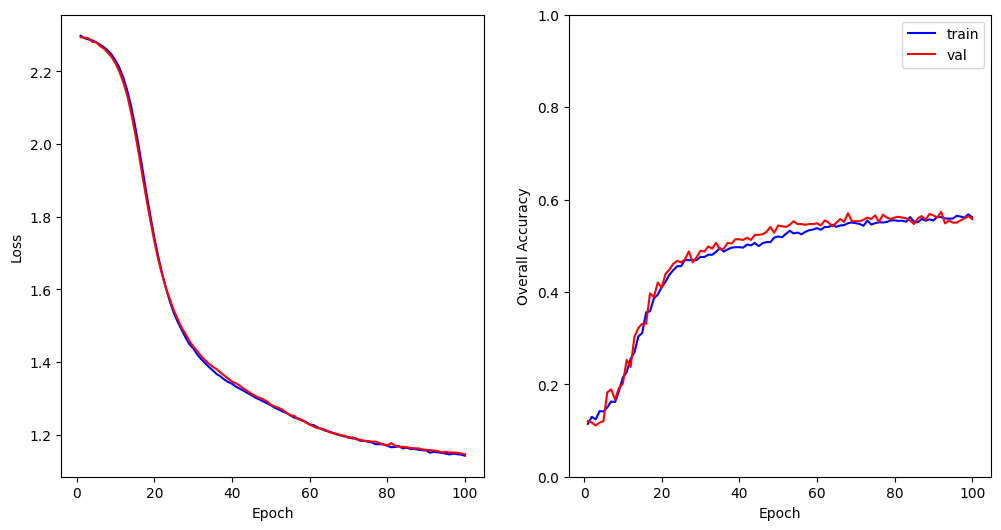

In [436]:
# re-initialise model instance and optimiser – this is important so that you can start anew
my_model = MyModel(in_features=X_train.size(1),
                   num_classes=len(species_order))

optimiser = SGD(my_model.parameters(),
                lr=0.1,
                weight_decay=0.001)                 # now with weight decay

# train model
NUM_EPOCHS = 100

my_model, loss_train, loss_val, accuracy_train, accuracy_val = train_model(my_model,
            optimiser,
            dataloader_train,
            dataloader_val,
            NUM_EPOCHS)

# plot training stats
plot_result(loss_train, loss_val, accuracy_train, accuracy_val)

You should see the gap between the training and validation loss curves close, but too much and the
overall accuracy doesn't reach the same level as before (trade-off between over- and underfitting).

Once you're happy, you can apply your trained model on the test set to obtain a final prediction:

In [437]:
def test_model(model, dataloader):
    model.eval()

    loss_test = 0.0

    # store per-data point predictions and labels for later
    predictions, labels = [], []
    with torch.no_grad():
        for X, y in dataloader:
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss_test += loss.item()
            predictions.append(y_hat)
            labels.append(y)
    
    # combine prediction and label tensors
    predictions, labels = torch.cat(predictions, 0), torch.cat(labels, 0)

    # return results
    return loss_test/len(dataloader), predictions, labels


# create test set dataloader
dataset_test = MyDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=False)

# predict on test set with model
loss, pred_test, labels_test = test_model(my_model, dataloader_test)

# report
oa_test = torch.mean((pred_test.argmax(1) == labels_test).float())
print(f'Test set loss: {loss:.2f}, overall accuracy: {oa_test:.2%}')

Test set loss: 1.14, overall accuracy: 57.87%


🖌️ Bonus: try adjusting other hyperparameters, for example:
* Increase the number of linear layers in the model
* Increase or decrease the `out_channels` of the model's intermediate layers
* Replace `nn.Sigmoid()` with another non-linearity, _e.g._ `nn.ReLU()`
* Try out different combinations of learning rate, weight decay, batch size

---

## 8. Summary

We have seen how deep learning models work, how they get trained, and have designed an entire
workflow in PyTorch to do so.

You might be disappointed to see that all of the above, including lots of coding, hyperparameter
search, and longer training times led to a test accuracy that is at best as good as what a random
forest could do for us last week.

If you've tried the bonus above, you probably also noticed that bigger models don't really help but
can make things worse. You may see now why deep learning had fallen out of fashion in the late 90s
to early 2000s: models like Support Vector Machine and Random Forest were just as powerful, but
lighter, quicker, and easier to develop.



### So what's the big deal with deep learning?

The data we collect today is orders of magnitude vaster and more complex than back in the 90s. Even
a single, tiny image of 800x600 pixels contains over 1.4 Million features. Using such data to make
semantically advanced predictions, such as which species is in an image, is an extremely difficult
task. Designing _e.g._ a Random Forest for this is feasible, but requires very complicated
engineering.

This is where deep learning shines: if the features and/or task are complex, and datasets are huge,
it starts to outperform more traditional ML models in _both_ performance and implementation
complexity.

Our SDM example seems to be neither. However, starting next week we will look into problems where
deep learning really does make sense. Crucially, the principles you have seen today form the basis
for any supervised deep learning model – up to large language models like GPT! So stay tuned for
what's to come!